# Customer Purchase Prediction Project

**By:** ChenXi Zu  
**Course:**  - BUSN5101 Programing for Business  
**Date:** 15/04/2025

---

## 1. Project Goal
I aim to predict whether a customer will return (make a repeat purchase) based on their transaction data.

---

## 2. Data Preparation
- Dropped missing `CustomerID`s
- Created `TotalPrice = Quantity × UnitPrice`
- Created target label `IsRepeat` based on repeat customer behavior

---

## 3. Modeling
- Logistic Regression: strong on class 1, poor recall on class 0
- Random Forest: improved accuracy, still biased
- Balanced RF: fairer model, better macro average

---

## 4. Results
- `TotalPrice` was the most important feature
- Balancing improved detection of one-time customers
- Macro F1-score went from ~0.5 → ~0.7+

---

## 5. Conclusion
Simple models like Random Forest + class balancing can power real business decisions like churn prediction or loyalty program targeting.


Logistic Regression - Confusion Matrix:
[[   1   23]
 [   1 1287]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.04      0.08        24
           1       0.98      1.00      0.99      1288

    accuracy                           0.98      1312
   macro avg       0.74      0.52      0.53      1312
weighted avg       0.97      0.98      0.97      1312

Random Forest - Confusion Matrix:
[[   8   16]
 [   6 1282]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.33      0.42        24
           1       0.99      1.00      0.99      1288

    accuracy                           0.98      1312
   macro avg       0.78      0.66      0.71      1312
weighted avg       0.98      0.98      0.98      1312



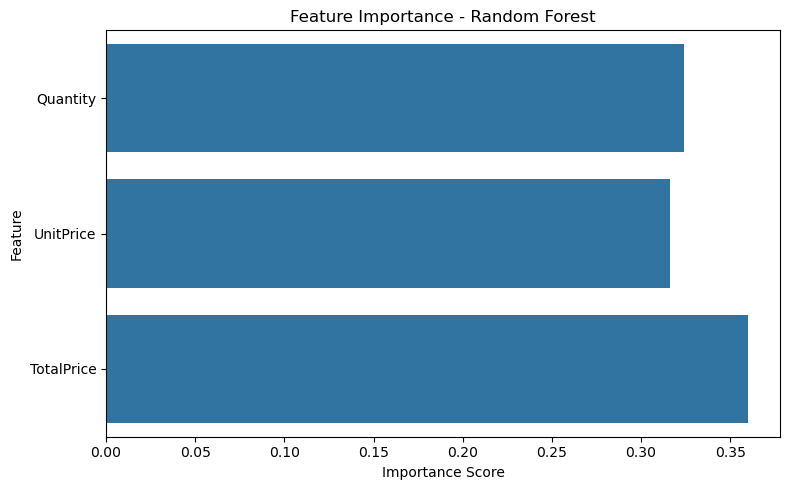

Balanced Random Forest - Confusion Matrix:
[[23  2]
 [ 5 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.90      0.78      0.84        23

    accuracy                           0.85        48
   macro avg       0.86      0.85      0.85        48
weighted avg       0.86      0.85      0.85        48



In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

# Load dataset
df = pd.read_csv(r'C:\Users\13707\anaconda3\Brandon\data.csv', encoding='ISO-8859-1')
df = df.copy()  

# Drop rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID']).copy()

# Create TotalPrice column
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Mark customers as repeat (1) or not (0)
customer_counts = df_clean['CustomerID'].value_counts()
df_clean['IsRepeat'] = df_clean['CustomerID'].apply(lambda x: 1 if customer_counts[x] > 1 else 0)

# Group data by CustomerID
customer_df = df_clean.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'TotalPrice': 'sum',
    'IsRepeat': 'max'  # Target variable
}).reset_index()

# Define features and target
X = customer_df[['Quantity', 'UnitPrice', 'TotalPrice']]
y = customer_df['IsRepeat']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Separate majority and minority classes
majority = customer_df[customer_df['IsRepeat'] == 1]
minority = customer_df[customer_df['IsRepeat'] == 0]

# Downsample majority
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

# Combine
balanced_df = pd.concat([majority_downsampled, minority])

# Features and labels
X_bal = balanced_df[['Quantity', 'UnitPrice', 'TotalPrice']]
y_bal = balanced_df['IsRepeat']

# Split again
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)

# Train and evaluate RF
rf_bal = RandomForestClassifier(random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = rf_bal.predict(X_test_bal)

print("Balanced Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test_bal, y_pred_bal))

print("\nClassification Report:")
print(classification_report(y_test_bal, y_pred_bal))
